In [2]:
# coding: utf-8
import sys
sys.path.append('C:/Users/KimDongyoung/Desktop/Github/my_git/mygit/DEEPLEARNING/밑바닥부터시작하는딥러닝2')
import numpy as np
import matplotlib.pyplot as plt
import sequence as sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

In [3]:
# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

In [4]:
# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size_list = [64, 128, 256]  # 다양한 hidden_size 값
batch_size = 128
max_epoch = 100
max_grad = 5.0

results = {}

for hidden_size in hidden_size_list:
    print(f"Training with hidden_size={hidden_size}...")
    model = Seq2seq(vocab_size, wordvec_size, hidden_size)
    # model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
    optimizer = Adam()
    trainer = Trainer(model, optimizer)

    acc_list = []
    for epoch in range(max_epoch):
        trainer.fit(x_train, t_train, max_epoch=1,
                    batch_size=batch_size, max_grad=max_grad)

        correct_num = 0
        for i in range(len(x_test)):
            question, correct = x_test[[i]], t_test[[i]]
            verbose = i < 10
            correct_num += eval_seq2seq(model, question, correct,
                                        id_to_char, verbose, is_reverse)

        acc = float(correct_num) / len(x_test)
        acc_list.append(acc)
        print(f'검증 정확도 %.3f%%' % (acc * 100))

    results[hidden_size] = acc_list



Training with hidden_size=64...
| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.54
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 2.35
| 에폭 1 |  반복 61 / 351 | 시간 0[s] | 손실 2.08
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 101 / 351 | 시간 1[s] | 손실 1.90
| 에폭 1 |  반복 121 / 351 | 시간 1[s] | 손실 1.87
| 에폭 1 |  반복 141 / 351 | 시간 1[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 2[s] | 손실 1.82
| 에폭 1 |  반복 181 / 351 | 시간 2[s] | 손실 1.80
| 에폭 1 |  반복 201 / 351 | 시간 2[s] | 손실 1.79
| 에폭 1 |  반복 221 / 351 | 시간 2[s] | 손실 1.78
| 에폭 1 |  반복 241 / 351 | 시간 3[s] | 손실 1.78
| 에폭 1 |  반복 261 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 281 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 301 / 351 | 시간 3[s] | 손실 1.76
| 에폭 1 |  반복 321 / 351 | 시간 4[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 4[s] | 손실 1.76
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1000
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1000
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 83

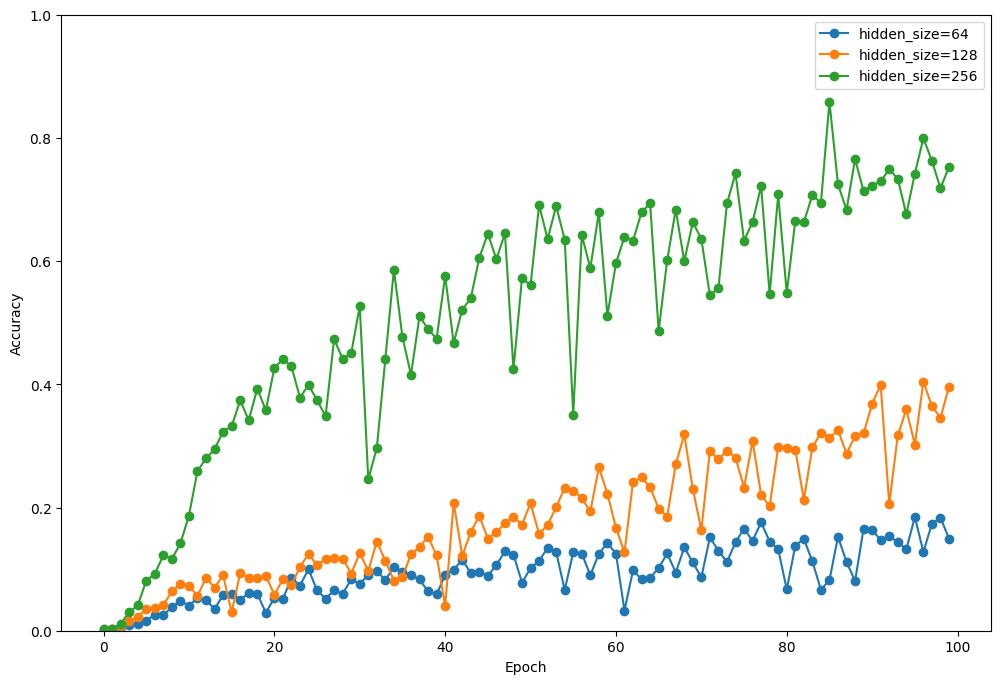

In [6]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
for hidden_size, acc_list in results.items():
    x = np.arange(len(acc_list))
    plt.plot(x, acc_list, marker='o', label=f'hidden_size={hidden_size}')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()